# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [235]:
# import google.colab.drive
from google.colab import drive

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
# Mount the drive
drive.mount('/content/drive/')

# set path to csv file
csv_path = '/content/drive/My Drive/ADSP/FoodHubProject/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Understanding the structure of the data

In [237]:
# read the data
df = pd.read_csv(csv_path + 'foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [238]:
# Write your code here
df.shape

(1898, 9)

#### Observations:<br>
The data is made of **1898 rows** and **9 columns**, which means there are **1898 entries** described through **9 features** in the dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [239]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Out of the 9 features in the data:
* **4** of them are **integers** (dtype _int64_) (**order_id**, **customer_id**, **food_preparation_time**, **delivery_time**),
* **4** are **strings** (dtype _object_) (**restaurant_name**, **cuisine_type**, **day_of_the_week**, **rating**),
* **1** is a **float** (dtype _float64_) (**cost_of_the_order**).

<br>**food_preparation_time** and **delivery_time** being recognized as integers by pandas suggest that these duration are expressed in minutes, without any second given.
<br>**rating** being recognized as 'object' suggests that the values contained in this column are actually of mixed dtypes. Rating could have been expected to be stored and treated as integer or float, as they're supposed to be numeric values. Checking the five first rows confirms that, in case a rating wasn't given, the value is stored as string 'Not given', hence the column being given dtype 'object'.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [240]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [241]:
# Let's check, that there is no rating starting with '-', making it negative once cast to integer

print(f"There are {df['rating'].str.startswith('-').sum()} values stating with a '-' character, which would hint at the existence of negative values.")

There are 0 values stating with a '-' character, which would hint at the existence of negative values.


In [242]:
# Let's avoid modifying the original data, using a copy
df1 = df.copy()
df1['numerical_rating'] = df1['rating'].replace('Not given', np.nan) # create new column containing numerical rating with 'Not given' turned into NaN
df1['numerical_rating'] = df1['numerical_rating'].astype('float') # cast new column as float, so that mathematical operations can be performed if need be
df1.dtypes

,0
order_id,int64
customer_id,int64
restaurant_name,object
cuisine_type,object
cost_of_the_order,float64
day_of_the_week,object
rating,object
food_preparation_time,int64
delivery_time,int64
numerical_rating,float64


In [243]:
# Let's check the count and proportion as percentage for each rating, 'Not given' comprised in it
df1['rating'].value_counts().to_frame().join(round(df1['rating'].value_counts(normalize=True)*100, 2))

,count,proportion
rating,,
Not given,736,38.78
5,588,30.98
4,386,20.34
3,188,9.91


In [244]:
# Let's check the count and proportion as percentage for each rating, but only for the numerical ratings
df1['numerical_rating'].value_counts().to_frame().join(round(df1['numerical_rating'].value_counts(normalize=True)*100, 2))

,count,proportion
numerical_rating,,
5.0,588,50.60
4.0,386,33.22
3.0,188,16.18


#### Observations:
Even though no NaN or empty value appear in any column, there needs be some operation done on the rating column.<br>
This column is supposed to contain values representing the rating given by customers.<br>
I checked that there was no negative value in the column (by checking no value started with '-').<br>
As noticed earlier, some rows contain a string value of 'Not given' for the rating feature, which explains why it is treated as having an object dtype.<br>
The rating feature being inherently of numerical nature, it seems logical to make it so the dtype associated with this feature is a numerical one.<br>
This is why, I chose add a new column 'numerical_rating' with the value 'Not given' replaced by np.nan and cast the column as a float , so as to be able to obtain numerical statistical information about it when need of it appears.<br>
Let's note that no rating below 3 was given.<br>
Let's note 'Not given' has the highest value count, which means that a majority of customers do not rate their experience.
Let's also note that if we take into account only the expressed, given ratings, half of them are the maximum rating possible, which is a substantial proportion.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [245]:
# Write your code here
df1.describe().T # Let's fetch descriptive statistics about the dataset. Apply Transpose to make it more easily readable.

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00
numerical_rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00


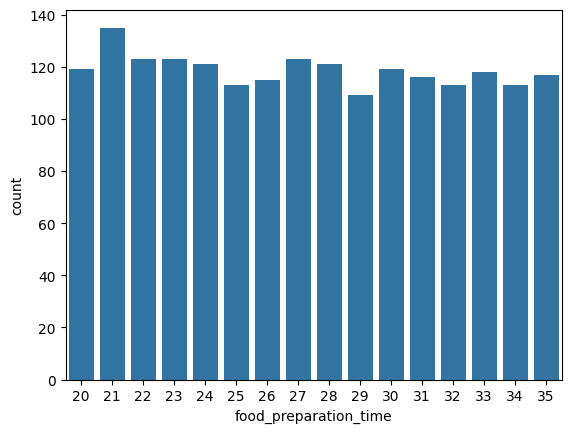

In [246]:
sns.countplot(x=df1['food_preparation_time']);

#### Observations:
The distribution of food preparation time is mostly uniform.<br>
**On average**, it takes **27.37 minutes** for food to be prepared once an order is placed, which is not very far from the median preparation time of 27 minutes, meaning the data is not skewed.<br>
The **minimum and maximum time** it takes food to be prepared are **20 minutes** and **35 minutes** respectively.<br>

### **Question 5:** How many orders are not rated? [1 mark]

In [247]:
# Write the code here
df1.numerical_rating.isnull().sum() # Returns the same result as subtracting the count value for rating (1162) from the length of the dataframe (1898)

736

#### Observations:
A total of **736** orders are not rated, that's to say **38.78%** of all orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

###Order ID

In [248]:
# Check the number of unique order ids
df1['order_id'].nunique()

1898

As could be expected, there are **as many unique order IDs as there are entries** in the dataset. <br>
The order ID needs to be unique for each single order, as this is the feature that will allow to identify every single one of the orders.<br>
If two different orders were to have the same ID, the two orders would be mixed up, resulting in some customer orders not to be processed and possible bugs in the app.

###Customer ID

In [249]:
nb_unique_cust_id = df1['customer_id'].nunique()
print(f'Number of unique customer IDs: {nb_unique_cust_id}'\
f'\nProportion of unique customer IDs in dataset: '\
f'{nb_unique_cust_id/df1.shape[0]:.4f}')

Number of unique customer IDs: 1200
Proportion of unique customer IDs in dataset: 0.6322


There are **1200 unique customer IDs** in the dataset, which means the number of unique customers having ordered is fairly high (63.22%), and that approximately 1/3 of the customers have issued several orders.

###Restaurant names

In [250]:
print(f"Number of unique restaurant names: {df1['restaurant_name'].nunique()}")

Number of unique restaurant names: 178


In [251]:
# Let's have a look at the restaurant names present in the dataset
df1['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [252]:
closed_restaurants = ['Empanada Mama (closed)', 'Dirty Bird To Go (archived)']
df1[df1['restaurant_name'].isin(closed_restaurants)].reset_index()

,index,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,numerical_rating
0,11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22,5.0
1,306,1477312,269793,Dirty Bird To Go (archived),American,8.54,Weekend,Not given,32,30,NaN
2,325,1476848,365401,Dirty Bird To Go (archived),American,15.57,Weekend,Not given,30,24,NaN
3,467,1478337,100527,Empanada Mama (closed),Mexican,5.92,Weekday,3,34,25,3.0
4,711,1477504,71613,Empanada Mama (closed),Mexican,15.57,Weekend,4,24,20,4.0
5,927,1476720,91958,Dirty Bird To Go (archived),American,12.13,Weekend,4,22,27,4.0
6,1103,1476822,284256,Empanada Mama (closed),Mexican,12.13,Weekend,5,21,22,5.0
7,1259,1477060,94152,Empanada Mama (closed),Mexican,14.21,Weekend,Not given,27,25,NaN
8,1322,1477655,96666,Empanada Mama (closed),Mexican,19.35,Weekend,5,29,22,5.0
9,1339,1477720,215219,Empanada Mama (closed),Mexican,19.98,Weekday,4,23,32,4.0


The dataset comprises **178 unique restaurant names**.<br>
In the list of restaurant names, we can see that two of them are marked as "closed" or "archived", meaning that, at the time the dataset was put together, they were closed or had already gone out of business for some reason.<br>
Out of the 1898 orders present in the dataset, 16 were made in these two restaurants, which represents a negligible proportion.

In [253]:
# Let's check the number of orders received by each restaurant,
# and have an idea of the percentages they represent.
df1['restaurant_name'].value_counts().to_frame().join(
    round(df1['restaurant_name'].value_counts(normalize=True)*100,2)
    )

,count,proportion
restaurant_name,,
Shake Shack,219,11.54
The Meatball Shop,132,6.95
Blue Ribbon Sushi,119,6.27
Blue Ribbon Fried Chicken,96,5.06
Parm,68,3.58
...,...,...
Sushi Choshi,1,0.05
Dos Caminos Soho,1,0.05
La Follia,1,0.05


The top 3 restaurants in terms of the number of orders received are **Shake Shack**, **The Meatball Shop**, **Blue Ribbon Sushi**, accounting for approximately **11.54%**, **6.95%** and **6.27%** of the orders received respectively.

###Cuisine Type

In [254]:
print(f'Number of unique cuisine types: {df1["cuisine_type"].nunique()}.')

Number of unique cuisine types: 14.


In [255]:
# Let's check the number of cuisine types,
# and have an idea of the percentages they represent in the orders received.
df1['cuisine_type'].value_counts().to_frame().join(
    round(df1['cuisine_type'].value_counts(normalize=True)*100,2)
    )

,count,proportion
cuisine_type,,
American,584,30.77
Japanese,470,24.76
Italian,298,15.70
Chinese,215,11.33
Mexican,77,4.06
Indian,73,3.85
Middle Eastern,49,2.58
Mediterranean,46,2.42
Thai,19,1.00


Text(0.5, 1.0, 'Popularity of cuisine types')

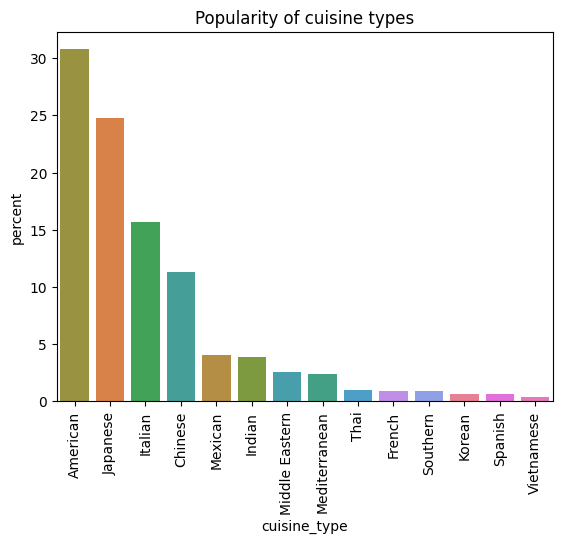

In [256]:
# Let's plot it!
cplot = sns.countplot(data=df1, x='cuisine_type', hue='cuisine_type',
                      order=df1['cuisine_type'].value_counts().index,
                      stat='percent')
# Rotate tick labels on x axis
cplot.tick_params(rotation=90, axis='x')
# Set title for the plot
cplot.set_title('Popularity of cuisine types')

There are **14** cuisine types in the dataset.<br>
The top 5 types of cuisine in terms of the number of orders received are **American** (30.77%), **Japanese** (24.76%), **Italian** (15.70%), **Chinese** (11.33%), and **Mexican** (4.06%).<br>
These **5 types** of cuisine amount for almost **87%** of orders received.

###Day of the Week

In [257]:
# Let's see which which of weekend or weekdays have the most orders
# and show values as absolute values and percentages
df1['day_of_the_week'].value_counts().to_frame().join(
    round(df1['day_of_the_week'].value_counts(normalize=True)*100,2)
    )

,count,proportion
day_of_the_week,,
Weekend,1351,71.18
Weekday,547,28.82


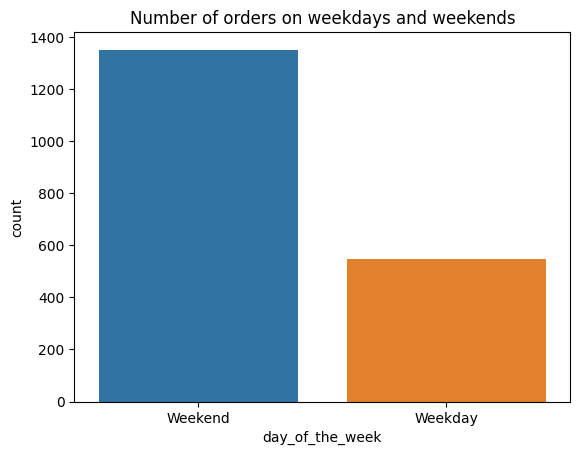

In [258]:
# Let's plot the data for days of the week
day_of_week_plt = sns.countplot(data=df1, x='day_of_the_week', hue='day_of_the_week');
# Set title for the plot
day_of_week_plt.set_title("Number of orders on weekdays and weekends")
plt.show()

Most of the orders are received during the weekend.<br>
**1351** orders are received during the weekend, which represents **71.18%** of the total orders received.<br>
Approximately 1/3 of the orders are received during on weekdays.

###Ratings

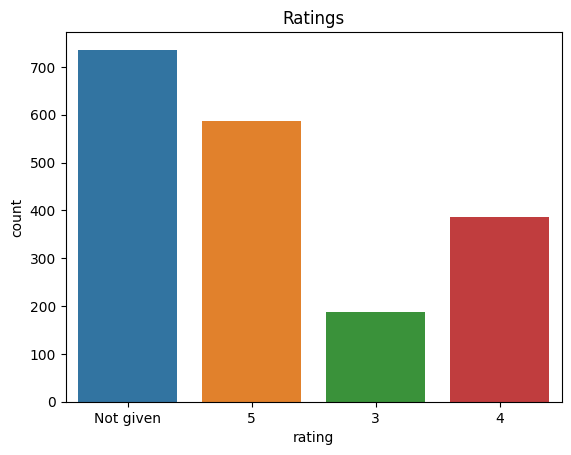

In [259]:
# Let's the distribution of ratings we have in the dataset (categorical)
plt_ratings = sns.countplot(data=df1, x='rating', hue='rating')
plt_ratings.set_title("Ratings") # Set title
plt.show()

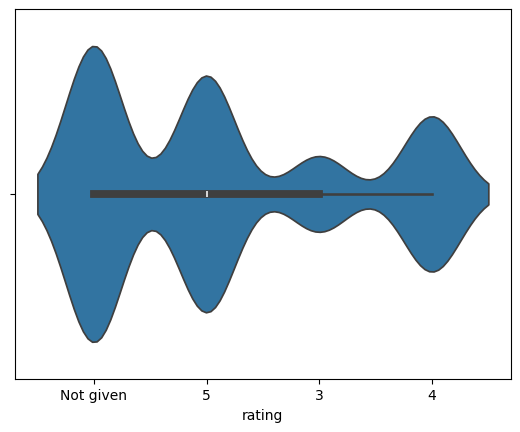

In [260]:
sns.violinplot(x=df1['rating'])
plt.show()

In [261]:
# Let's output some statistical data about our numerical ratings
df1['numerical_rating'].describe()

,numerical_rating
count,1162.000000
mean,4.344234
std,0.741478
min,3.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


A majority of orders (**38.78%**) have not been rated.<br>
When taking into account only the orders that have been rated, they have received a rating of **4 on average**.<br>
No rating lower than 3 has been given.

### Food Preparation time

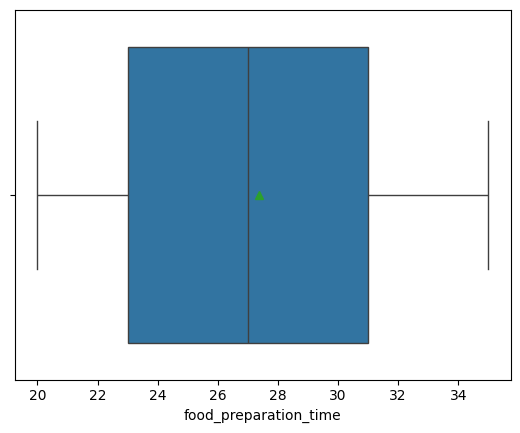

In [262]:
sns.boxplot(x=df1['food_preparation_time'], showmeans=True);

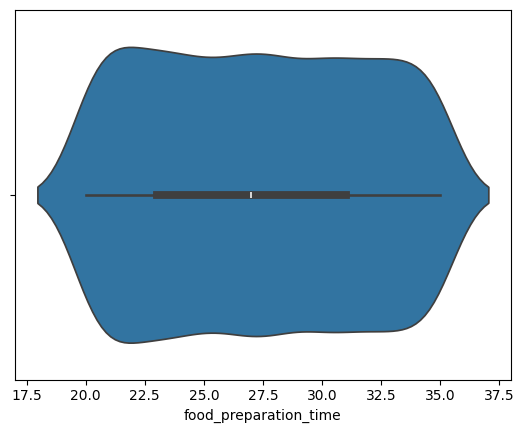

In [263]:
sns.violinplot(x=df1['food_preparation_time']);

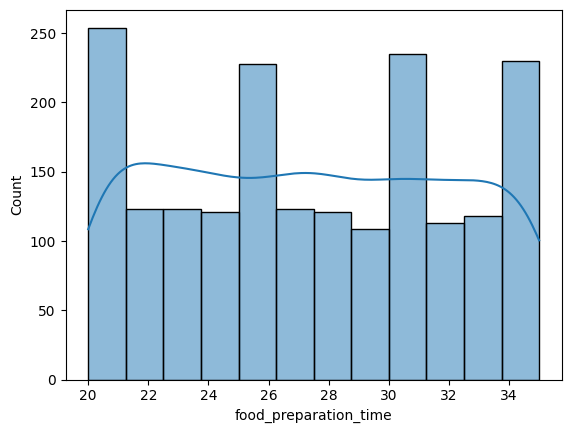

In [264]:
sns.histplot(x=df1['food_preparation_time'], kde=True);

Food preparation times are uniformly distributed, even though the histgram shows peaks on certain values.<br>
The median and mean food preparation time are close to one another.

### Delivery time

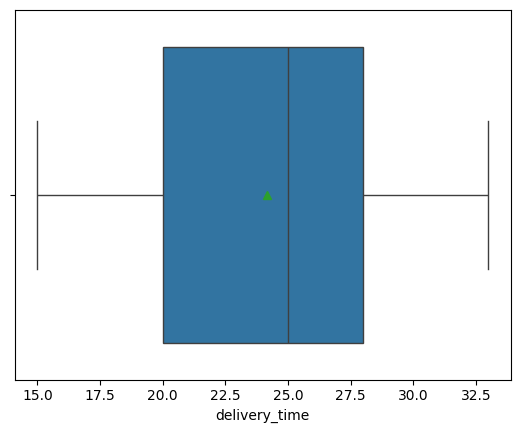

In [265]:
sns.boxplot(x=df1['delivery_time'], showmeans=True);

<Axes: xlabel='delivery_time'>

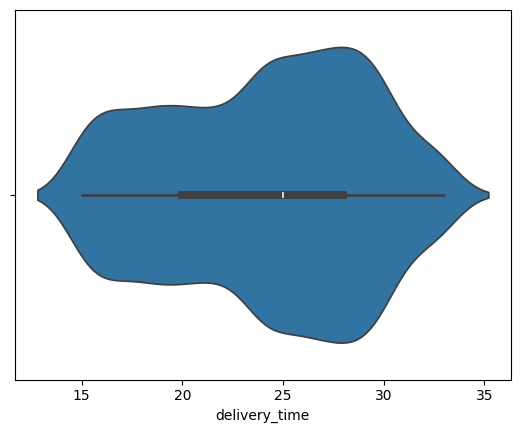

In [266]:
sns.violinplot(x=df1["delivery_time"])

The **median delivery time** is of **25 minutes**.<br>
The larger part of delivery time is comprised between 23 and 32 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [267]:
# Write the code here
# Let's see which restaurants are the most popular in terms of orders received
# and show values as absolute values and percentages
df1['restaurant_name'].value_counts().to_frame().join(
    round(df1['restaurant_name'].value_counts(normalize=True)*100,2)
    )[:5]

,count,proportion
restaurant_name,,
Shake Shack,219,11.54
The Meatball Shop,132,6.95
Blue Ribbon Sushi,119,6.27
Blue Ribbon Fried Chicken,96,5.06
Parm,68,3.58


#### Observations:
The top 5 restaurants in terms of orders received are **Shake Shack** (219 orders or 11.54% of overall orders), **The Meatball Shop** (132 orders, or 6.95% of overall orders), **Blue Ribbon Sushi** (119 orders, or 6.27% of the overall orders), **Blue Ribbon Fried Chicken** (96 orders, or 5.06% of the overall orders), and **Parm** (68 orders, or 3.58% or the overall orders).<br>
We may note that there is an important delta in terms of numbers of orders received as weel as in proportion, between the 1st and 2nd (over 4%) restaurants in the top 5 list, and that such a delta is not to be found anywhere else in the top 5 list afterwards.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [268]:
# Let's see which cuisine is the most popular on weekends
# and show values as absolute values and percentages
df1[df1['day_of_the_week'] == 'Weekend'].cuisine_type.value_counts().to_frame().join(round(df1[df1['day_of_the_week'] == 'Weekend']['cuisine_type']
            .value_counts(normalize=True)*100,2))

,count,proportion
cuisine_type,,
American,415,30.72
Japanese,335,24.80
Italian,207,15.32
Chinese,163,12.07
Mexican,53,3.92
Indian,49,3.63
Mediterranean,32,2.37
Middle Eastern,32,2.37
Thai,15,1.11


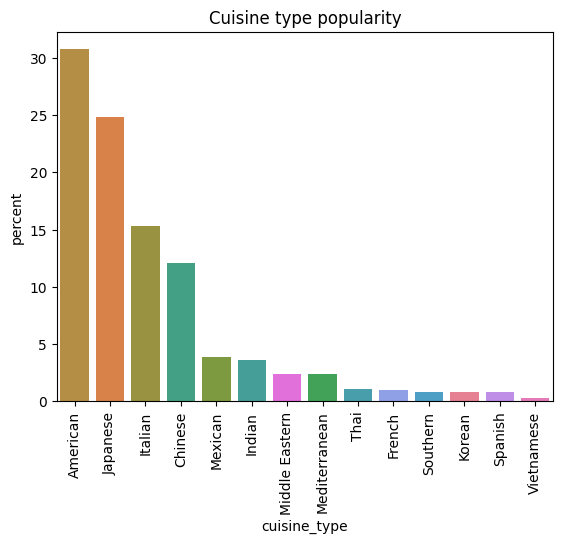

In [269]:
most_popular_cuisine = sns.countplot(
    data=df1[df1['day_of_the_week'] == 'Weekend'],
    x='cuisine_type', hue='cuisine_type',
    order=df1['cuisine_type'].value_counts().index,
    stat='percent'
    )
# Set title for the plot
most_popular_cuisine.set_title('Cuisine type popularity')
# Rotate tick labels on x axis
most_popular_cuisine.tick_params(rotation=90, axis='x')

#### Observations:
The most popular cuisine type on weekends is **American cuisine**, with 415 orders on weekends (30.72% of orders received on weekends).<br>
The second and third most popular cuisine types are **Japanese cuisine** and **Italian cuisine**, amounting to 24.80% and 15.32% of the orders received respectively on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [270]:
# Write the code here
# Compute and store the number of orders with a cost > 20
orders_gt_20 = df1['cost_of_the_order'][df1['cost_of_the_order'] > 20].value_counts().sum()
# Compute percentage
og20_pct = round(orders_gt_20 / df1.shape[0] * 100, 2)
print(f'Percentage of orders over $20: {og20_pct}%')

Percentage of orders over $20: 29.24%


#### Observations:
The percentage of orders that costs more than $20 is **29.24%**.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [271]:
# Write the code here
print(f"Mean delivery time: {round(df1['delivery_time'].mean(),2)} minutes")

Mean delivery time: 24.16 minutes


#### Observations:
The mean order delivery time is **24.16 minutes**.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [272]:
# Write the code here
# Capture the 1st three customer IDs in terms of orders placed,
# with their respective order counts.
df1.customer_id.value_counts()[:3]

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
The top 3 most frequent customers are the ones identified by the following customer IDs:
* **52832** with **13** orders placed,
* **47440** with **10** orders placed,
* **83287** with **9** orders placed.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


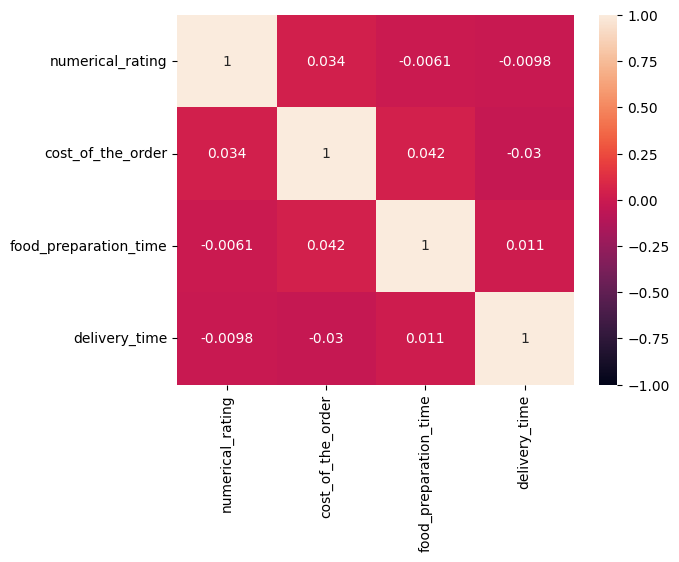

In [273]:
# Write the code here
# Let's first plot a correlation heatmap of numerical features that mae sense
cols = ['numerical_rating', 'cost_of_the_order', 'food_preparation_time',
        'delivery_time'] # IDs would make no sense
sns.heatmap(df1[cols].corr(), annot=True, vmax=1, vmin=-1);

#### Observations on correlations:
Judging from the correlation heatmap, when a correlation exists, it is not a strong one (with a delta from 0 lower than 0.05).<br>
The cost of the order and the rating of the order are positively correlated, with a correlation score of 0.034.<br>
The cost of the order and the food preparation time are also positively correlated, with a score of 0.042.<br>
The delivery time and the food preparation time are also positively correlated, with a score of 0.011.<br>
The cost of the order and the delivery time are negatively correlated, with a score of -0.03<br>
The other relationships are so low in score that they are negligible.

### Restaurant name vs cost of the order

In [274]:
# Let's have a look at the total revenue for each restaurant in the dataset
restaurant_by_revenue = df1.groupby(
    ['restaurant_name']
    ).cost_of_the_order.sum().sort_values(ascending=False).reset_index()
restaurant_by_revenue.head(15)

,restaurant_name,cost_of_the_order
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76
5,RedFarm Broadway,965.13
6,RedFarm Hudson,921.21
7,TAO,834.50
8,Han Dynasty,755.29
9,Blue Ribbon Sushi Bar & Grill,666.62


In terms of total revenue by restaurant, the top 5 restaurants are **Shake Shack** (\$3,579.53), **The Meatball Soup** (\$2,145.21), **Blue Ribbon Sushi** (\$1,903.95), **Blue Ribbon Fried Chicken** (\$1662.29), and **Parm** (\$112.76).<br>
It is to be noted that this top 5 list of restaurants in terms of earnings matches the top 5 list of restaurants in terms of orders received.

### Cuisine type vs Cost of the order

In [275]:
df1[['cuisine_type', 'cost_of_the_order']].groupby('cuisine_type').cost_of_the_order.describe()

,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
American,584.0,16.319829,7.462290,4.71,12.0800,14.120,22.2600,33.18
Chinese,215.0,16.305209,7.631503,4.75,12.1050,14.120,21.8800,34.19
French,18.0,19.793889,6.508990,11.98,13.0525,20.470,23.6550,29.25
Indian,73.0,16.919726,7.897493,5.34,11.6400,16.150,24.2000,33.03
Italian,298.0,16.418691,7.268831,5.05,12.0800,14.480,22.2600,33.03
Japanese,470.0,16.304532,7.422722,4.47,12.0800,14.070,21.8300,33.37
Korean,13.0,14.001538,7.563540,5.77,11.8400,12.180,14.0200,30.75
Mediterranean,46.0,15.474783,7.604720,5.67,12.0925,13.995,18.7825,35.41
Mexican,77.0,16.933117,7.555108,4.85,12.0800,15.570,22.3600,33.32


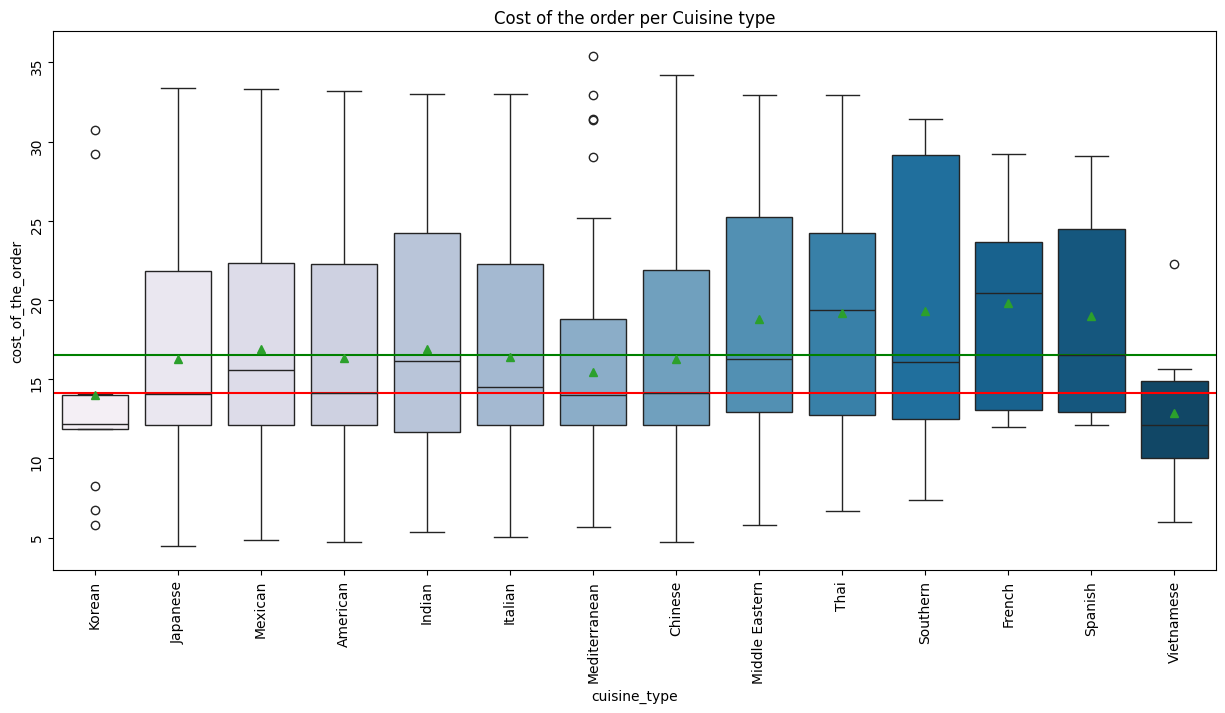

In [276]:
plt.figure(figsize=(15,7)) # set plot size
cuisine_type_vs_cost = sns.boxplot(data=df1, x="cuisine_type",
                                   y="cost_of_the_order", hue='cuisine_type',
                                   legend=False, palette='PuBu', showmeans=True)
# Draw a green line to show overall mean
plt.axhline(y=df1['cost_of_the_order'].mean(), c='g')
# Draw a red line to show overall median
plt.axhline(y=df1['cost_of_the_order'].median(), c='r')
cuisine_type_vs_cost.tick_params(rotation=90)
cuisine_type_vs_cost.set_title('Cost of the order per Cuisine type')
plt.show()

In the above boxplot, the overall **mean cost of order** is represented by a **green line**, the overall **median of cost of order** is represented with a **red line**.<br>
The cuisine types with a mean cost of order superior to the overall mean cost of order are the **French**, **Southern**, **Thai**, **Spanish** and **Middle-Eastern** types.<br>
The **Vietnamese** and **Korean** types have a mean cost of order way inferior to the overall mean cost of order.<br>
The other types have a mean cost of order that is fairly close to the overall mean.<br>
The **Mexican**, **Indian**, **Middle-Eastern**, **Thai**, **Southern** and **French** types have **median cost of order superior to the overall median**, with **French** cuisine having the **highest median cost of order**.<br>
The two types of cuisine with the **lowest cost of order** are **Korean** and **Vietnamese**.<br>
Some datapoints appear as **outliers** in the boxplot for **Korean**, **Mediterranean**, and **Vietnamese** cuisines.

###Cuisine vs delivery time

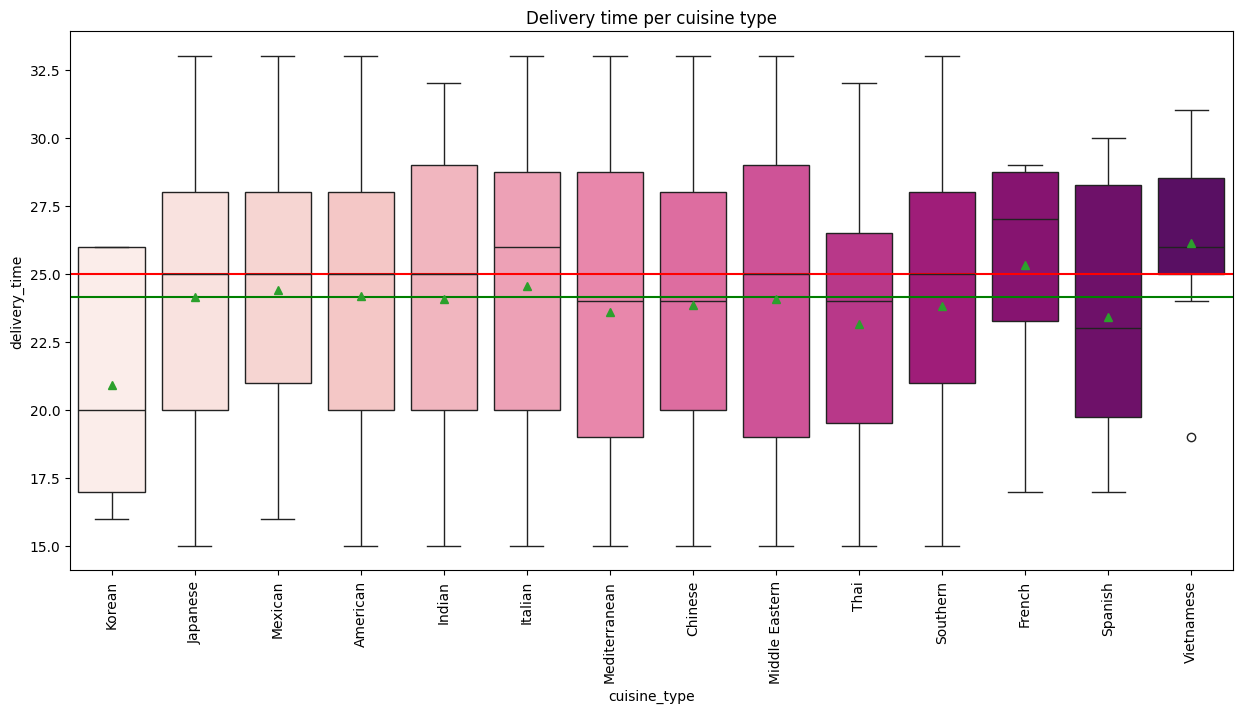

In [277]:
plt.figure(figsize=(15,7)) # Set plot size
cuisine_type_vs_delivery_time = sns.boxplot(data=df1, x='cuisine_type',
                                            y='delivery_time',
                                            hue='cuisine_type',
                                            legend=False, palette='RdPu',
                                            showmeans=True)
# Draw a green line to show overall mean
plt.axhline(y=df1['delivery_time'].mean(), c='g')
# Draw a red line to show overall median
plt.axhline(y=df1['delivery_time'].median(), c='r')
# Rotate tick labels on x axis
cuisine_type_vs_delivery_time.tick_params(rotation=90, axis='x')
# set title
cuisine_type_vs_delivery_time.set_title('Delivery time per cuisine type')
plt.show()


The mean delivery time for most of the cuisine types are close to the overall avearge delivery time, except for **French and Vietnamese cuisine** where the mean delivery time is **notably higher than the overall mean delivery time**.<br>
The **mean and median delivery times** for **Korean** cuisine is very **clearly inferior to the overall mean and median delivery times**.<br>
The **median** delivery time for **Italian**, **French** and **Vietnamese** cuisine are **higher than the overall median delivery time**.<br>
One datapoint appears as **an outlier** for **Vietnamese cuisine**, showing a **particularly short delivery time**, one time.<br>

### Cuisine type vs time of preparation

In [278]:
df1.groupby('cuisine_type').food_preparation_time.describe()

,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
American,584.0,27.440068,4.658474,20.0,23.00,27.0,31.0,35.0
Chinese,215.0,27.511628,4.758525,20.0,23.50,27.0,32.0,35.0
French,18.0,26.888889,5.039712,21.0,22.50,25.5,31.0,35.0
Indian,73.0,27.109589,4.620491,20.0,23.00,27.0,31.0,35.0
Italian,298.0,27.483221,4.519474,20.0,23.00,28.0,31.0,35.0
Japanese,470.0,27.510638,4.604496,20.0,24.00,27.5,32.0,35.0
Korean,13.0,25.461538,3.971049,20.0,23.00,25.0,26.0,33.0
Mediterranean,46.0,27.000000,4.908043,20.0,23.00,27.0,31.0,35.0
Mexican,77.0,26.727273,4.604450,20.0,23.00,26.0,31.0,35.0


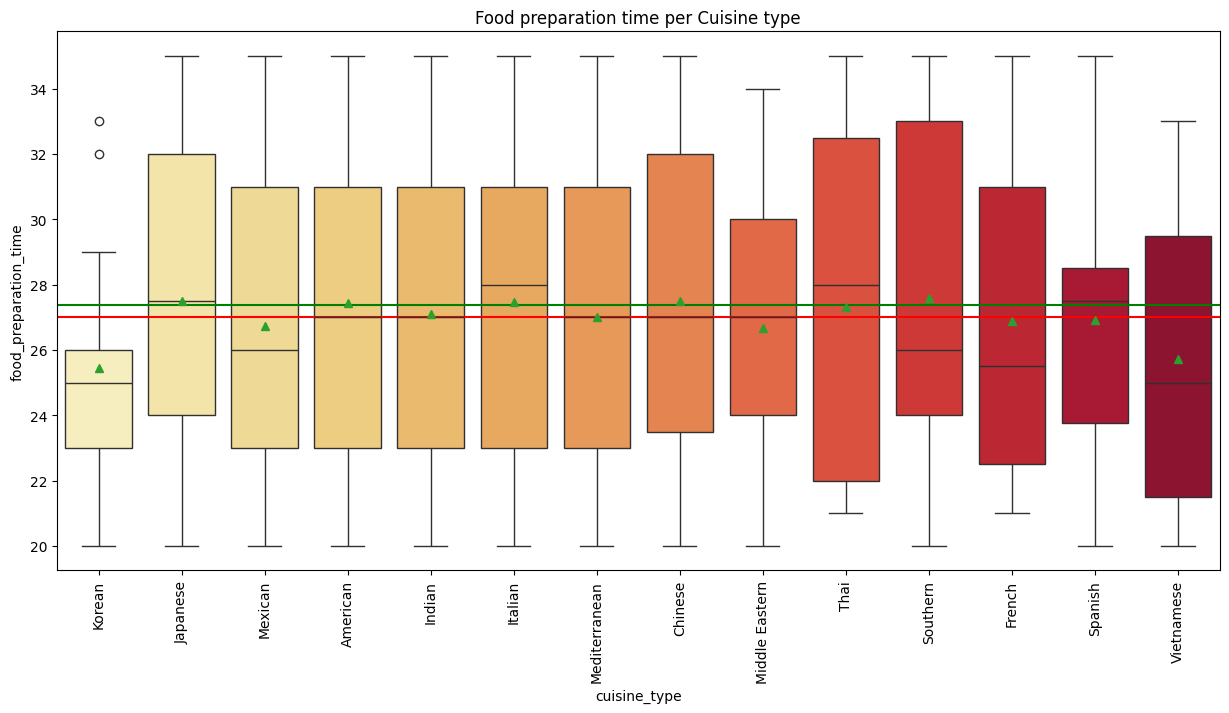

In [279]:
plt.figure(figsize=(15,7)) # Set plot size
cuisine_type_vs_preparation_time = sns.boxplot(data=df1, x="cuisine_type",
                                   y="food_preparation_time", hue='cuisine_type'
                                   , legend=False, showmeans=True,
                                   palette='YlOrRd')
# Rotate tick labels on x axis
cuisine_type_vs_preparation_time.tick_params(rotation=90, axis='x')
cuisine_type_vs_preparation_time.set_title(
    "Food preparation time per Cuisine type"
    )
plt.axhline(y=df1['food_preparation_time'].mean(), c='g')
plt.axhline(y=df1['food_preparation_time'].median(), c='r')
plt.show()

The overall mean and median food preparation time are fairly close.<br>
Except for the Korean and Vietnamese cuisine, the mean food preparation time of each cuisine type is close to the overall mean preparation time.<br>
The **Southern**, **French**, **Vietnamese**, **Mexican**, and **Korean** cuisines have a median preparation time **lower than the overall median preparation time**.<br>
The **Italian** and **Thai** cuisines have a median preparation time **higher than the overall median prepation time**.<br>
**Southern cuisine** has the **highest proportion of orders with long preparation times**, with **75%** of them taking **up to 33 minutes** to be prepared.<br>

### Day of the week vs delivery time

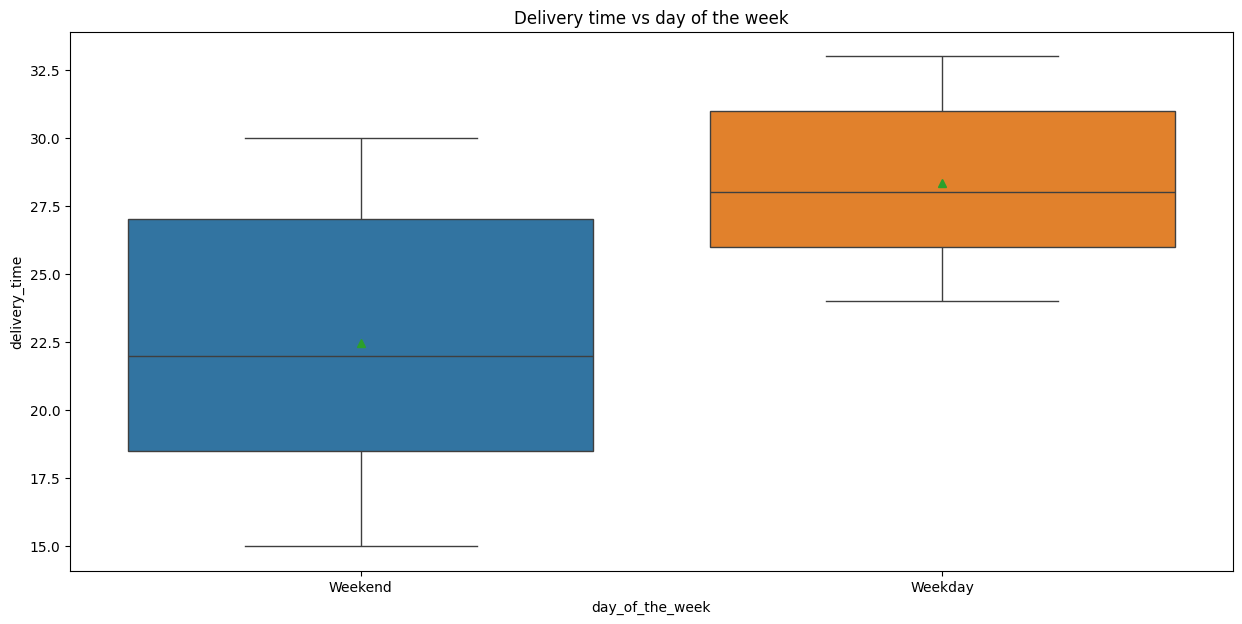

In [280]:
plt.figure(figsize=(15,7))
day_of_the_week_vs_delivery_time = sns.boxplot(data=df1, x="day_of_the_week",
                                               y="delivery_time",
                                               hue='day_of_the_week',
                                               legend=False, showmeans=True)
day_of_the_week_vs_delivery_time.set_title(
    "Delivery time vs day of the week"
    ) # Set title for the plot
plt.show()

Delivery time takesd longer on weekdays than on weekends.<br>
Median and mean close to on another for each category.<br>
The median delivery time is between 22 and 22.5 minutes on weekends, while it is over 27.5 mintes on weekdays.

### Food preparation time vs day of the week

Text(0.5, 1.0, 'Food preparation time vs day of the week')

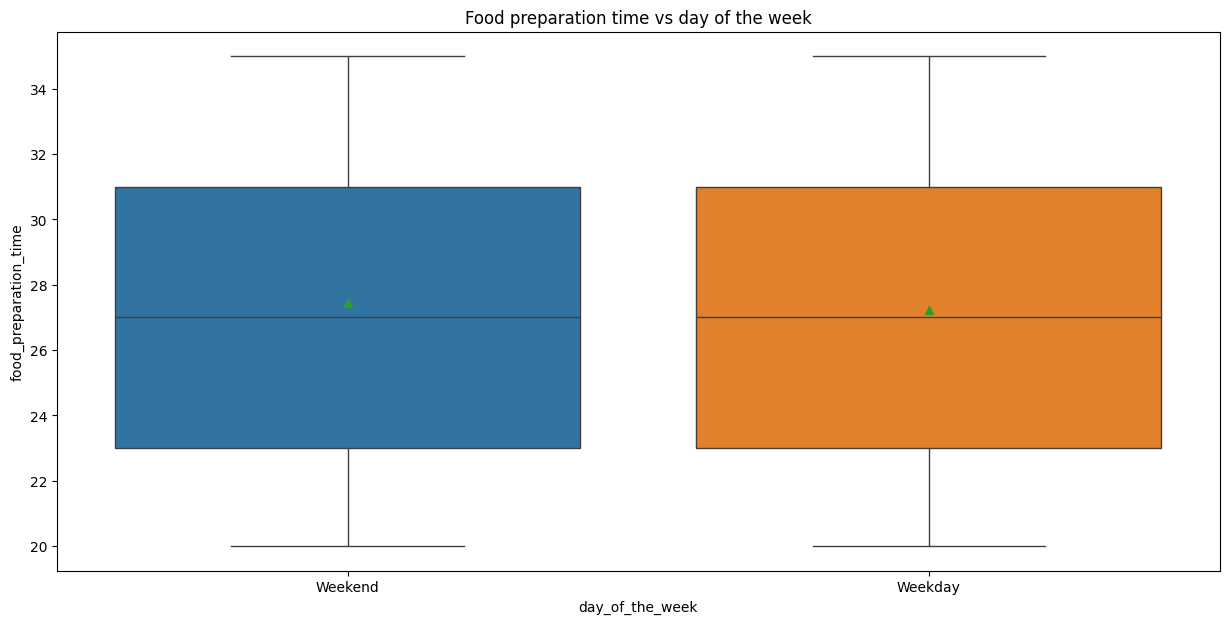

In [281]:
plt.figure(figsize=(15,7))
day_of_the_week_vs_food_prep_time = sns.boxplot(data=df1, x="day_of_the_week",
                                               y="food_preparation_time",
                                               hue='day_of_the_week',
                                               legend=False, showmeans=True)
day_of_the_week_vs_food_prep_time.set_title(
    "Food preparation time vs day of the week"
    ) # Set title for the plot

There is no important difference in food preparation depending on the day the week, except for a slight difference in the means: the mean preparation time is slightly higher during weekends.

###Rating vs delivery time

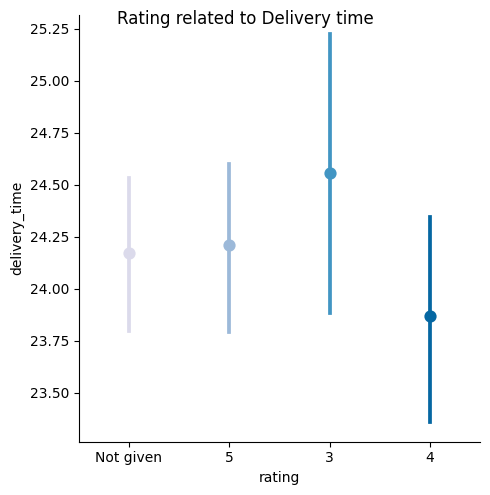

In [282]:
# Let's call a point plot to see the relationship between rating and delivery
# time
rating_vs_delivery_time = sns.catplot(data=df1, x='rating', y='delivery_time',
                                      hue='rating', palette='PuBu',
                                      legend=False, kind="point");
# Let's add a nice title
rating_vs_delivery_time.fig.suptitle("Rating related to Delivery time")
plt.show()

**An absence of rating or a rating of 5** is most likely is likely to be given for a an order with a **mean delivery time of 24.20 minutes**, and with a confidence interval spanning from rouglhy 23.80 minutes and 24.60 minutes. There is **no clear difference** between these two ratings, when related to delivery time.<br>
For orders with a **mean delivery time of 24.55 minutes**, and with a confidence interval spanning from 23.87 minutes to 25.25 minutes, a **rating of 3** is most likely to be given.<br>
For orders with a **mean delivery time of 23.87 minutes**, and with a confidence interval spanning from 23.20 minutes to 25.37 minutes, a **rating of 4** is most likely to be given.<br>

### Rating vs Cost of the order

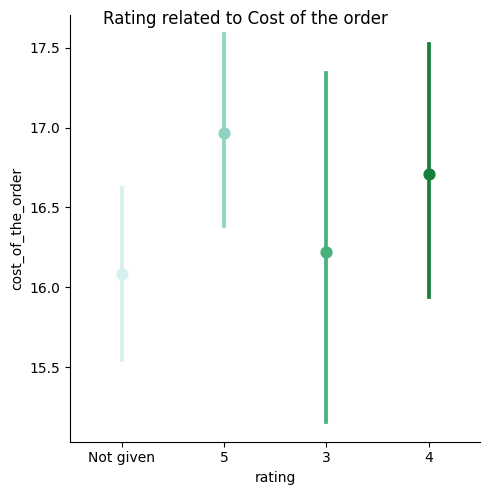

In [283]:
# Let's call a point plot to see the relationship between rating and cost of
# order
rating_vs_cost_of_order = sns.catplot(data=df1, x='rating',
                                      y='cost_of_the_order', kind='point',
                                      hue='rating', palette='BuGn',
                                      legend=False)
# Let's add a nice title
rating_vs_cost_of_order.fig.suptitle('Rating related to Cost of the order')
plt.show()

For orders with a **mean of \$16.10 cost**, and with a confidence interval spanning from \$15.50 to \$16.65, **no rating** is most likely to be given by customers.<br>
For orders with a **mean cost of \$16.22**, and with a confidence interval spanning from \$15.10 to \$17.48, a **rating of 3** is most likely to be given.<br>
For orders with a **mean cost of \$16.75**, and with a confidence of interval spanning from \$16 to \$17.5, a **rating of 4** is most likely to be given.<br>
For orders with a **mean cost of \$16.95**, and with a confidence of interval spanning from \$16.45 to \$17.65, a **rating of 5** is most likely to be given.<br>

###Rating vs food preparation time

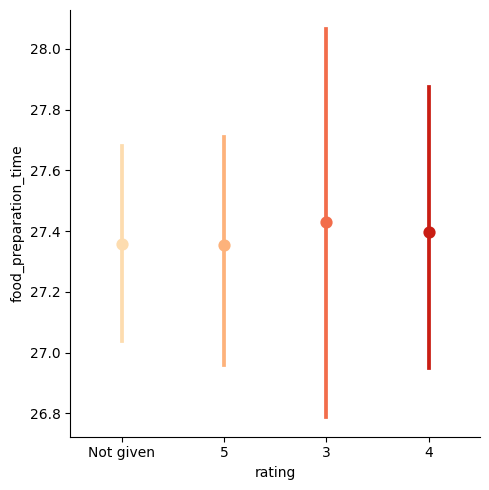

In [284]:
# Let's call a point plot to see the relationship between rating and food
# preparation time
rating_vs_prep_time = sns.catplot(data=df1, x='rating',
                                      y='food_preparation_time', kind='point',
                                      hue='rating', palette='OrRd',
                                      legend=False)
# Let's add a nice title
rating_vs_cost_of_order.fig.suptitle('Rating related Food preparation time')
plt.show()

**An absence of rating or a rating of 5** is most likely is likely to be given for a an order with a **mean food preparation time of 27.35 minutes**. The confidence interval for a rating of 5 spans from 27 minutes to 28 minutes, while the one for no rating is a little narrower.<br>
For orders with a **mean food preparation time of 27.43 minutes**, and with a confidence interval spanning from 26.79 minutes to 28.30 minutes, a **rating of 3** is most likely to be given.<br>
For orders with a **mean food preparation time of 27.39 minutes**, and with a confidence interval spanning from 26.90 minutes to 27.83 minutes, a **rating of 4** is most likely to be given.

### Rating vs cuisine type

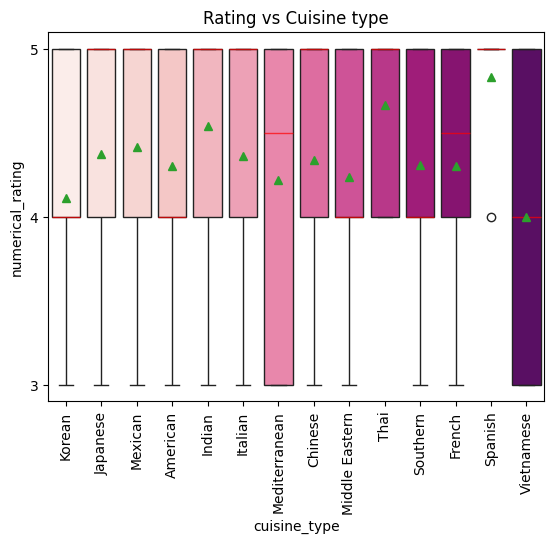

In [285]:
rating_vs_cuisine = sns.boxplot(data=df1, x='cuisine_type',
                                y=df1['numerical_rating'],
                                hue='cuisine_type', legend=False,
                                palette='RdPu', showmeans=True,
                                medianprops=dict(color="r", alpha=0.7))
plt.yticks([3,4,5]) # Constrain y ticks to these values
# Rotate tick labels on x axis
rating_vs_cuisine.tick_params(rotation=90, axis='x')
# Set title for the plot
rating_vs_cuisine.set_title('Rating vs Cuisine type')
plt.show()

Most of the cuisine types are highly rated, with their median rating being of at least 4.<br>
Japanese and Italia cuisine (two of the most popular cuisines) have a median rating of 5, making them very highly rated.<br>

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [286]:
# Write the code here
# Let's create a separate dataframe with each restaurant and its count of
# ratings
df_rating_count = df1.groupby('restaurant_name').numerical_rating.count().sort_values(ascending=False).reset_index()
# Let's rename the 'numerical_rating' column in our new dataframe to
# 'rating_count'
df_rating_count.rename(columns = {'numerical_rating': 'rating_count'},
                       inplace=True)
# Let's extract the list of restaurant names with over 50 rating counts
restaurant_over_50_rating_counts = df_rating_count[df_rating_count['rating_count'] > 50]['restaurant_name']
# Let's now get a Series with each restaurant name having over 50 rating counts
# as index, and the mean rating they received
df1[df1['restaurant_name'].isin(restaurant_over_50_rating_counts)].groupby(
    'restaurant_name')['numerical_rating'].mean().sort_values(ascending=False)

,numerical_rating
restaurant_name,
The Meatball Shop,4.511905
Blue Ribbon Fried Chicken,4.328125
Shake Shack,4.278195
Blue Ribbon Sushi,4.219178


#### Observations:
4 restaurants fulfill the criteria to get the promotional offer:
* **The Meatball Shop** (4.51 mean rating)
* **Blue Ribbon Fried Chicken** (4.33 mean rating)
* **Shake Shack** (4.28 mean rating)
* **Blue Ribbon Sushi** (4.22 mean rating)

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [287]:
# Write the code here
def calculate_company_revenue(x):
  if x > 20: # if order costs more than $20
    return x * 0.25 # charge 25%
  elif x > 5: # if order costs more than $5
    return x * 0.15 # charge 15%
  else: # Othewise
    return x * 0 # No charge

# Now let's create a new column to store the company revenue for each order
df1['Company_Revenue'] = df1["cost_of_the_order"].apply(calculate_company_revenue)
# Let's check that we do have the new column in our dataset
df1.sort_values(by='Company_Revenue', ascending=False).head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,numerical_rating,Company_Revenue
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29,4.0,8.8525
1646,1477665,231061,Han Dynasty,Chinese,34.19,Weekday,Not given,21,31,NaN,8.5475
1762,1477700,60039,Blue Ribbon Sushi,Japanese,33.37,Weekday,3,30,27,3.0,8.3425
1831,1476970,275689,Nobu Next Door,Japanese,33.37,Weekend,4,32,21,4.0,8.3425
1370,1478329,116992,Tres Carnes,Mexican,33.32,Weekday,4,21,33,4.0,8.3300


In [288]:
# Let's see which restaurants bring the most revenue to the company
# Limit output to the 10 first rows
df1.groupby('restaurant_name').Company_Revenue.sum().sort_values(
        ascending=False).reset_index()[:10]

,restaurant_name,Company_Revenue
0,Shake Shack,703.6070
1,The Meatball Shop,419.8285
2,Blue Ribbon Sushi,360.4605
3,Blue Ribbon Fried Chicken,340.2035
4,Parm,218.5570
5,RedFarm Broadway,191.4675
6,RedFarm Hudson,180.9340
7,TAO,167.3570
8,Han Dynasty,149.3985
9,Rubirosa,140.8085


In [289]:
# Let's see which cuisine types bring the most revenue to the company
df1.groupby('cuisine_type').Company_Revenue.sum().sort_values(
        ascending=False).reset_index()

,cuisine_type,Company_Revenue
0,American,1878.2740
1,Japanese,1478.2445
2,Italian,966.8845
3,Chinese,690.0405
4,Mexican,256.6930
5,Indian,246.9940
6,Middle Eastern,193.5535
7,Mediterranean,136.3280
8,Thai,78.0525
9,French,76.1925


In [290]:
# Let's sum it all to obtain the net revenue generated across all orders.
print(f"The net revenue generated by the company across all orders is ${round(df1['Company_Revenue'].sum(),2):,.2f}")

The net revenue generated by the company across all orders is $6,166.30


#### Observations:
The net revenue generated by the company across  all orders is \$6,166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [291]:
# Write the code here
# Let's create a new colum to store the total time required to deliver the food
# once an order is placed, i.e. food_preparation_time + delivery_time
df1['Total_time'] = df1['food_preparation_time'] + df1['delivery_time']
# Let's now calculate what proportion orders requiring more than 60 minutes to
# be delivered once the order is placed represents
proportion_oders_over_60_total_time = df1[df1['Total_time'] > 60]['order_id'].count()/df1.shape[0]
print(f"Percentage of orders orders taking more than 60 minutes to get "\
      f"delivered from the time the order is placed: "\
       f"{round(proportion_oders_over_60_total_time*100,2)}%")

Percentage of orders orders taking more than 60 minutes to get delivered from the time the order is placed: 10.54%


#### Observations:
**10.54%** of orders have taken **more than 60 minutes** to get delivered once the order had been placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [292]:
# Write the code here
# Let's extract the mean delivery time by day_of_the_week
# This piece of information is also visible in the corresponding visualization
# in the multivariate analysis
df1.groupby('day_of_the_week').delivery_time.mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


In [293]:
# Let's also extract the total time it takes an order to be delivered, on
# weekdays and during weekends
df1.groupby('day_of_the_week').Total_time.mean()

,Total_time
day_of_the_week,
Weekday,55.552102
Weekend,49.906736


#### Observations:
The mean delivery time of the orders is **longer on weekdays** than during weekends.<br>
On average, it takes **28.34 minutes** for an order to be delivered on **weekdays** (55.55 minutes if preparation time is taken into account), while it takes **22.47 minutes** for an order to be delivered during **weekends** (49.91 minutes if food preparation time is taken into account).

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
We analyzed a dataset of 1898 orders from 178 restaurant in New York City. The data spanned 9 features.<br>
We have been able to conclude that:
* The 4 most popular cuisine types are: American, Japanese, Italian, and Chinese
* There is no difference in cuisine popularity from weekdays to weekends
* There is a difference in delivery time depending on the day of the week (weekday or weekend), but contrary to intuition, delivery time is longer on weekdays.
* The 5 most popular restaurants serve a cuisine that is among the 4 most popular cuisine types
* The 4 most popular cuisine types have a median and mean cost of order that fits the overall tendency.
* The 3 most popular cuisine types are highly rated.
* Food preparation time does not have a significant impact on rating.
* Contrary to intuition, rating and delivery time are not significantly correlated.
* Rating and cost of order are positvely, yet weakly, correlated.
* More than 1/3 of orders are not rated.

### Recommendations:

* American, Japanese, and Italian are the most popular cuisine type. Some other types might gain from more exposure through advertisement.
* Make customers more inclined to rate their order with badges earned for rating, for example.
*  Provide promotional offers through advertisement to restaurants bringing the most value to the company, so as to increase revenue gained from their orders.
* Investigate the reasons why delivery time is so much higher on weekdays than during weekends.
* Provide date time data might help to identify patterns. This may lead to a drop in the proportion of orders requiring more than 60 minutes to be delivered.
* Develop a model that can predict the best/fastest route from a restaurant to customer location.

---